 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [67]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [68]:
# Reading whale returns
whale_returns_csv = "C:/Users/kd_84/uofm-stp-virt-fin-09-2021-u-c/material/03-Python-Pandas/Homework/Starter_Code/Resources/whale_returns.csv"
whale_returns = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [69]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [70]:
# Drop nulls
whale_returns.dropna(inplace = True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [71]:
# Reading algorithmic returns
algo_returns_csv = "C:/Users/kd_84/uofm-stp-virt-fin-09-2021-u-c/material/03-Python-Pandas/Homework/Starter_Code/Resources/algo_returns.csv"
algo_returns = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [72]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [73]:
# Drop nulls
algo_returns.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [74]:
# Reading S&P 500 Closing Prices
sp500_csv = "C:/Users/kd_84/uofm-stp-virt-fin-09-2021-u-c/material/03-Python-Pandas/Homework/Starter_Code/Resources/sp500_history.csv"
sp500_history = pd.read_csv(sp500_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
sp500_history.sort_index(ascending=True, inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [75]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [76]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace("$", "", regex=True).astype("float")
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [77]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [78]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [79]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns ={'Close': 'S&P 500'}, inplace=True)
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [80]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis='columns', join='inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

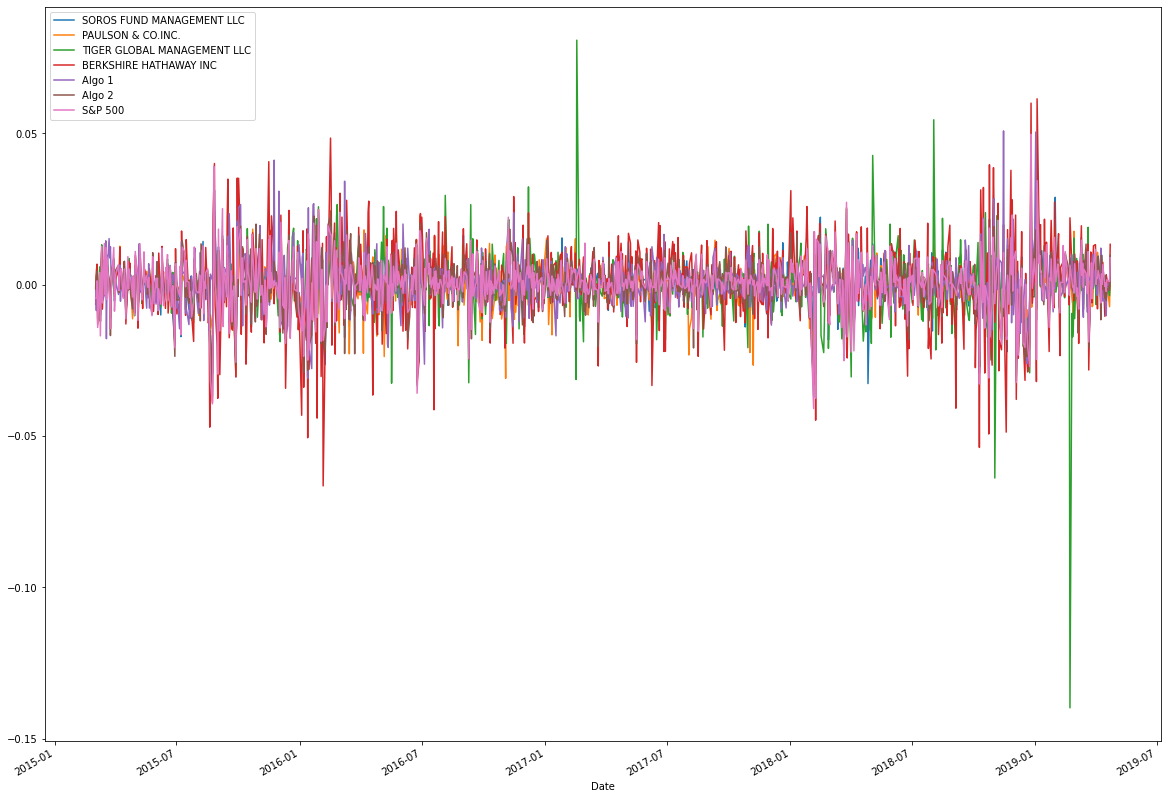

In [81]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(20,15))

In [82]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + combined_returns).cumprod() - 1
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928
...,...,...,...,...,...,...,...
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,0.372945
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,0.369823
2019-04-18,0.159278,-0.217322,-0.141222,0.534716,0.923823,0.259590,0.371986


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of All'}, xlabel='Date'>

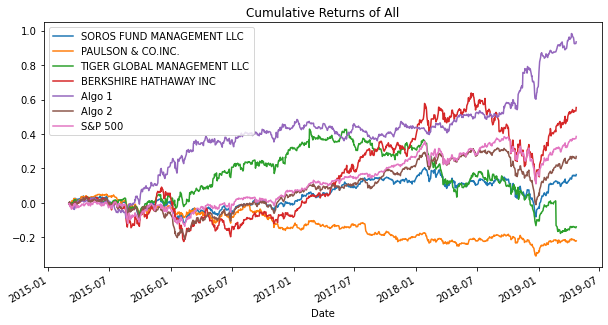

In [83]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() -1
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of All")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

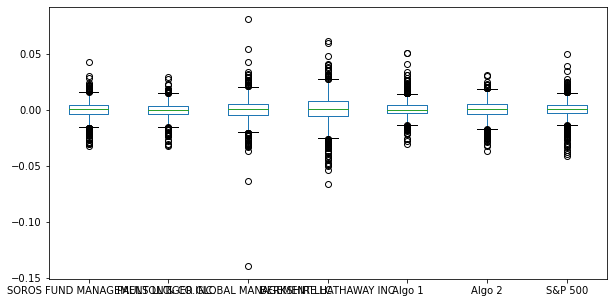

In [84]:
# Box plot to visually show risk
combined_returns.plot(kind = 'box', figsize=(10,5))

### Calculate Standard Deviations

In [85]:
# Calculate the daily standard deviations of all portfolios
combined_returns.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [86]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_returns['S&P 500'].std()
print(sp500_std)
# Determine which portfolios are riskier than the S&P 500
combined_returns.std() > sp500_std

0.008553731597758204


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [87]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_returns.std() *np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

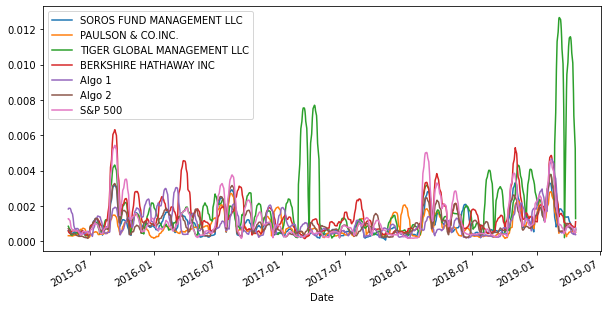

In [88]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_days = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_days.rolling(window=21).std().plot(figsize=(10,5))

### Calculate and plot the correlation

In [89]:
# Calculate the correlation
std_correlate = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(std_correlate, vmin=-1, vmax=1)

NameError: name 'sns' is not defined

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

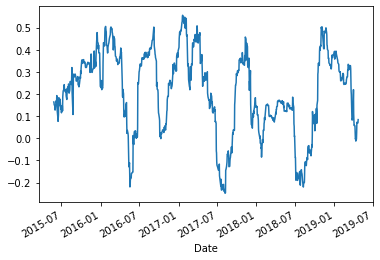

In [90]:
# Calculate covariance of a single portfolio
covariance = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['S&P 500'])
# Calculate variance of S&P 500
variance = combined_returns['S&P 500'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

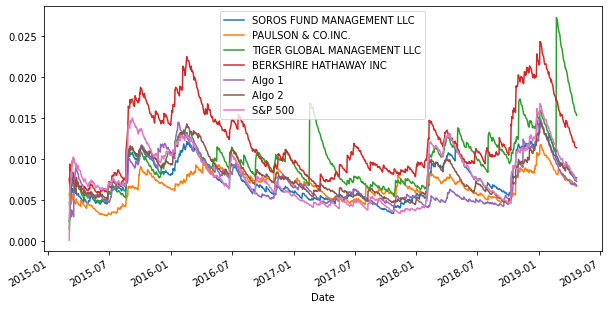

In [91]:
# Use `ewm` to calculate the rolling window
ewm = combined_returns.ewm(halflife=21).std()
ewm.plot(figsize=(10,5))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [92]:
# Annualized Sharpe Ratios
sharpe = (combined_returns.mean() *225) / (combined_returns.std() *np.sqrt(252))

<AxesSubplot:>

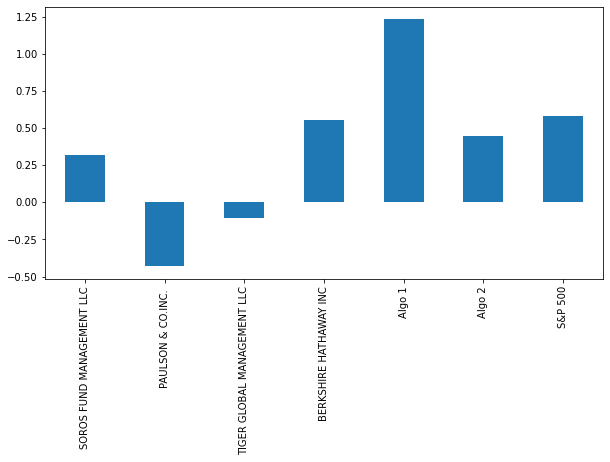

In [93]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot.bar(figsize=(10,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [94]:
#Yes they outperform.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [123]:
# Reading data from 1st stock
goog_csv = "C:/Users/kd_84/uofm-stp-virt-fin-09-2021-u-c/material/03-Python-Pandas/Homework/Starter_Code/Resources/goog_historical.csv"
goog_history = pd.read_csv(goog_csv, infer_datetime_format=True, parse_dates=True)
goog_history.sort_index(ascending=True, inplace=True)
goog_history.rename(columns ={'Close': 'Google'}, inplace=True)
goog_history.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [124]:
# Reading data from 2nd stock
aapl_csv = "C:/Users/kd_84/uofm-stp-virt-fin-09-2021-u-c/material/03-Python-Pandas/Homework/Starter_Code/Resources/aapl_historical.csv"
aapl_history = pd.read_csv(aapl_csv, infer_datetime_format=True, parse_dates=True)
aapl_history.sort_index(ascending=True, inplace=True)
aapl_history.rename(columns ={'Close': 'Apple'}, inplace=True)
aapl_history.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [125]:
# Reading data from 3rd stock
cost_csv = "C:/Users/kd_84/uofm-stp-virt-fin-09-2021-u-c/material/03-Python-Pandas/Homework/Starter_Code/Resources/cost_historical.csv"
cost_history = pd.read_csv(cost_csv, infer_datetime_format=True, parse_dates=True)
cost_history.sort_index(ascending=True, inplace=True)
cost_history.rename(columns ={'Close': 'Costco'}, inplace=True)
cost_history.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [126]:
# Combine all stocks in a single DataFrame
combo = pd.concat([goog_history, aapl_history, cost_history], axis='columns', join='inner')
combo.head()

,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38,AAPL,5/9/2019,200.72,COST,5/9/2019,243.47
1,GOOG,5/8/2019,1166.27,AAPL,5/8/2019,202.90,COST,5/8/2019,241.34
2,GOOG,5/7/2019,1174.10,AAPL,5/7/2019,202.86,COST,5/7/2019,240.18
3,GOOG,5/6/2019,1189.39,AAPL,5/6/2019,208.48,COST,5/6/2019,244.23
4,GOOG,5/3/2019,1185.40,AAPL,5/3/2019,211.75,COST,5/3/2019,244.62


In [127]:
# Reset Date index
combo.reset_index()

,index,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP
0,0,GOOG,5/9/2019,1162.38,AAPL,5/9/2019,200.72,COST,5/9/2019,243.47
1,1,GOOG,5/8/2019,1166.27,AAPL,5/8/2019,202.90,COST,5/8/2019,241.34
2,2,GOOG,5/7/2019,1174.10,AAPL,5/7/2019,202.86,COST,5/7/2019,240.18
3,3,GOOG,5/6/2019,1189.39,AAPL,5/6/2019,208.48,COST,5/6/2019,244.23
4,4,GOOG,5/3/2019,1185.40,AAPL,5/3/2019,211.75,COST,5/3/2019,244.62
...,...,...,...,...,...,...,...,...,...,...
245,245,GOOG,5/17/2018,1078.59,AAPL,5/17/2018,186.99,COST,5/17/2018,199.60
246,246,GOOG,5/16/2018,1081.77,AAPL,5/16/2018,188.18,COST,5/16/2018,198.71
247,247,GOOG,5/15/2018,1079.23,AAPL,5/15/2018,186.44,COST,5/15/2018,195.48
248,248,GOOG,5/14/2018,1100.20,AAPL,5/14/2018,188.15,COST,5/14/2018,195.88


In [128]:
# Reorganize portfolio data by having a column per symbol
combo.T

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
Symbol,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,...,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Trade DATE,5/9/2019,5/8/2019,5/7/2019,5/6/2019,5/3/2019,5/2/2019,5/1/2019,4/30/2019,4/29/2019,4/26/2019,...,5/24/2018,5/23/2018,5/22/2018,5/21/2018,5/18/2018,5/17/2018,5/16/2018,5/15/2018,5/14/2018,5/11/2018
NOCP,1162.38,1166.27,1174.1,1189.39,1185.4,1162.61,1168.08,1188.48,1287.58,1272.18,...,1079.24,1079.69,1069.73,1079.58,1066.36,1078.59,1081.77,1079.23,1100.2,1098.26
Symbol,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,...,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Trade DATE,5/9/2019,5/8/2019,5/7/2019,5/6/2019,5/3/2019,5/2/2019,5/1/2019,4/30/2019,4/29/2019,4/26/2019,...,5/24/2018,5/23/2018,5/22/2018,5/21/2018,5/18/2018,5/17/2018,5/16/2018,5/15/2018,5/14/2018,5/11/2018
NOCP,200.72,202.9,202.86,208.48,211.75,209.15,210.52,200.67,204.61,204.3,...,188.15,188.36,187.16,187.63,186.31,186.99,188.18,186.44,188.15,188.59
Symbol,COST,COST,COST,COST,COST,COST,COST,COST,COST,COST,...,COST,COST,COST,COST,COST,COST,COST,COST,COST,COST
Trade DATE,5/9/2019,5/8/2019,5/7/2019,5/6/2019,5/3/2019,5/2/2019,5/1/2019,4/30/2019,4/29/2019,4/26/2019,...,5/24/2018,5/23/2018,5/22/2018,5/21/2018,5/18/2018,5/17/2018,5/16/2018,5/15/2018,5/14/2018,5/11/2018
NOCP,243.47,241.34,240.18,244.23,244.62,242.69,241.59,245.53,244.28,243.82,...,198.89,198.14,198.97,199.62,198.96,199.6,198.71,195.48,195.88,195.76


In [129]:
# Calculate daily returns
combo_returns = combo.pct_change()
# Drop NAs
combo_returns.dropna(inplace=True)
# Display sample data
combo_returns.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [130]:
# Set weights
weights = [1/3, 1/3, 1/3]
portfolio = combo_returns.dot(weights)
# Calculate portfolio return
portfolio = (1 + portfolio).cumprod -1
# Display sample data
portfolio.head()

NameError: name 'combo_returns' is not defined

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [142]:
# Join your returns DataFrame to the original returns DataFrame
combo_joint = pd.concat([portfolio, S&P 500], axis='columns', join='inner')
combo_joint.columns = ['Mine', 'S&P']
combo_joint.head()

SyntaxError: invalid syntax (<ipython-input-142-e763b95d021d>, line 2)

In [143]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combo_joint.dropna(inplace=True)

NameError: name 'combo_joint' is not defined

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [144]:
# Calculate the annualized `std`
combo_joint_std = combo_joint.std() *np.sqrt(252)

NameError: name 'combo_joint' is not defined

### Calculate and plot rolling `std` with 21-day window

In [145]:
# Calculate rolling standard deviation
combo_joint_std = combo_joint_std.rolling(window=21).std()
# Plot rolling standard deviation
combo_joint_std.rolling(window=21).std().plot(figsize=(10,5))

NameError: name 'combo_joint_std' is not defined

### Calculate and plot the correlation

In [146]:
# Calculate and plot the correlation
correlate = combo_joint_std.corr()
sns.heatmap(correlate, vmin=-1, vmax=1)

NameError: name 'combo_joint_std' is not defined

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [147]:
# Calculate and plot Beta
covariance = combined_returns['Mine'].rolling(window=60).cov(combined_returns['S&P'])
variance = combined_returns['S&P'].rolling(window=60).var()
rolling_beta = covariance / variance
rolling_beta.plot()

KeyError: 'Mine'

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [148]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio = (combo_joint.mean() *225) / (combo_joint.std() *np.sqrt(252))

NameError: name 'combo_joint' is not defined

In [149]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(figsize=(10,5))

NameError: name 'sharpe_ratio' is not defined

### How does your portfolio do?

Write your answer here!

In [ ]:
#It has higher returns with diversification.